# AdaBoost

Let us implement the AdaBoost algorithm, to build a powerful emsemble classifier from a set of weaker classifiers. Our base classifier will be a decision stump.

The training algorithm we will implement is as follows. We have $N$ training datapoints and are creating an ensemble of $k$ classifiers.

- Initialize the weights for all datapoints ($w_j = 1/N$ for $j=1,2,...N$)
- For $i = 1$ to $k$
    - Form training set $D_i$ by sampling $N$ tuples (with replacement) from the full training dataset. The sampling probability for a tuple $(x_j,y_j)$ should be given by its corresponding weight $w_j$.
    - Use dataset $D_i$ to fit a decision stump $M_i$. You can use sklearn's DecisionTreeClassifier with max_depth=1 to fit a decision stump.
    - Calculate the error rate for $M_i$ using the sum of the weights of the misclassified points.
    $$err(M_i) = \sum_{j=1}^N w_j * \mathbb{1}\{y_j \ne M_i(x_j)\}$$
    - The weight of classifier $M_i$'s vote is computed as $\alpha_i = 0.5*\log(\frac{1-err(M_i)}{err(M_i)})$
    - Increase the weight of the misclassified training points, and decrease the weight of the correctly classified training points.
    $$w_j \leftarrow w_j * \exp\{- \alpha_i * y_j * M_i(x_j)\}$$
    - Remember to normalize the weights so that they sum to 1.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Import the libraries / functions that you use in your solution
from sklearn.tree import DecisionTreeClassifier
import random
random.seed(10)
def train_AdaBoost(X, y, k):
    
    classifiers = []
    alphas = []
    
    ### BEGIN SOLUTION
    
    N = X.shape[0]
    D = np.concatenate((X, y.reshape(-1, 1)), axis=1)
    
    # Initialize weights
    weights = [1/N for _ in range(N)]
    
    for i in range(k):
        
        # Sample from the dataset according to weights 
        D_i = np.array(random.choices(population = D, k = N, weights=weights))
        
        # Fit a decision stump 
        classifier = DecisionTreeClassifier(random_state=0,max_depth = 1)
        classifier.fit(D_i[:,[0,1]],D_i[:,2])
        
        # Calculate the error rate
        err = sum([weights[i] for i in range(N) if classifier.predict([D[i,0:2]])[0]!=D[i,2]])
        
        # Calculate the weight of classifier's vote
        alpha = 0.5*np.log((1-err)/err)
        
        # Increase the weight of misclassified points
        weights = [weights[i]*np.exp(-alpha*D[i,2]*classifier.predict([D[i,0:2]])[0]) for i in range(N)]#updating weights
        s = sum(weights)
        weights = [x/s for x in weights]#normalising weights
        
        # Append your classifier to the list classifiers
        classifiers.append(classifier)
        
        # Append your alpha to the list alphas
        alphas.append(alpha)
        
    ### END SOLUTION
    
    # classifiers and alphas need of be of type <class 'list'>
    return classifiers, alphas

To obtain predictions, the vote of each classifier $M_i$ is weighted by its corresponding coefficient $\alpha_i$.

$$y_i = \text{sign}\{\sum_{i=1}^k \alpha_i*M_i(x_i)\}$$

In [8]:
def predict_AdaBoost(X,classifiers, alphas):
    
    ### BEGIN SOLUTION
    n = len(classifiers)
    y_pred = np.zeros(len(X))
    for i in range(len(X)):
        y_pred[i] = 1 if sum([classifiers[j].predict([X[i]])*alphas[j] for j in range(n)])>=0 else -1
    ### END SOLUTION
    
    # y_pred needs to be of type <class 'numpy.ndarray'>
    return y_pred

The below function will help you plot the decision surface given by the algorithm.

In [9]:
def plot_AdaBoost(X, y, classifiers, alphas,name):
    
    # Get limits of x and y for plotting the decision surface
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    # Get points at a distance of h between the above limits 
    h = .2    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    temp = np.c_[xx.ravel(), yy.ravel()]
    
    # Classify the all the points
    P = predict_AdaBoost(temp, classifiers, alphas).reshape(yy.shape)
    
    # Plot the decision boundary and margin   
    plt.pcolormesh(xx, yy, P, cmap=plt.cm.coolwarm, shading='auto')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.savefig(name+'.png')
    plt.show()

Load the given datasets.

In [10]:
import pandas as pd
X_train = pd.read_csv("X_train.csv")
Y_train = pd.read_csv("y_train.csv")
X_train = X_train.iloc[:, [0,1]].values
Y_train = Y_train.iloc[:, [0]].values
X_test = pd.read_csv("X_train.csv")
Y_test = pd.read_csv("y_train.csv")
X_test = X_test.iloc[:, [0,1]].values
Y_test = Y_test.iloc[:, [0]].values

Plot the training data as a scatter plot.

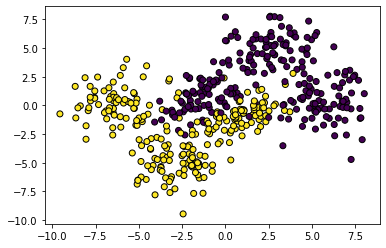

In [11]:
plt.scatter(X_train[:,0],X_train[:,1],c = Y_train, edgecolor='k')
plt.savefig('train_plot.png')
plt.show()

Use the train_AdaBoost function to train an AdaBoost model with k=5.

In [12]:
classifiers_5,alphas_5 = train_AdaBoost(X_train, Y_train, 5)

Use the predict_AdaBoost function to make predictions on X_test.

In [13]:
Y_pred_5 = predict_AdaBoost(X_test,classifiers_5, alphas_5)

Use the plot_AdaBoost function to plot the learnt decision surface.

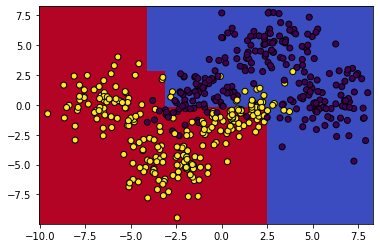

In [14]:
plot_AdaBoost(X_test, Y_test, classifiers_5, alphas_5,'k=5')

Compute the accuracy of the predictions on the test set.

In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred_5))

0.906054279749478


Use the train_AdaBoost function to train an AdaBoost model with k=100.

In [16]:
classifiers_100,alphas_100 = train_AdaBoost(X_train, Y_train, 100)

Use the predict_AdaBoost function to make predictions on X_test.

In [17]:
Y_pred_100 = predict_AdaBoost(X_test,classifiers_100, alphas_100)

Use the plot_AdaBoost function to plot the learnt decision surface.

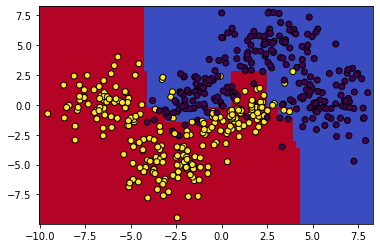

In [18]:
plot_AdaBoost(X_test, Y_test, classifiers_100, alphas_100,'k=100')

Compute the accuracy of the predictions on the test set.

In [19]:
print(accuracy_score(Y_test,Y_pred_100))

0.9373695198329853
